In [1]:
import warnings 
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
os.getcwd()
#os.chdir("new path")

'C:\\Users\\aatif\\Downloads'

In [3]:
dataset = pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.tail()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [6]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [7]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [9]:
# EDA - Pandas profiling / dataprep / lux / dtale
#!pip install pandas-profiling

In [10]:
from pandas_profiling import ProfileReport

prof = ProfileReport(dataset)
prof.to_file(output_file ='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [13]:
dataset = dataset.drop(['Item Code','Quantity','Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'], axis=1)
dataset.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [14]:
dataset.duplicated().sum()

6008

In [15]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [16]:
dataset.duplicated().sum()

0

In [17]:
dataset = dataset.rename(columns={'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
dataset.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [18]:
dataset.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [19]:
dataset = dataset.dropna(subset=['CustomerID'])

In [20]:
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [21]:
# Analyse date part
import datetime as dt

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [23]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [25]:
dataset['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [26]:
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [27]:
RFMScore = dataset.groupby('CustomerID').agg({'Date': lambda x : (latest_date - x.max()).days,
                                             'InvoiceNo' : lambda x : x.count(),
                                             'Price' : lambda x : x.sum()})

RFMScore.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'},inplace=True)

In [29]:
RFMScore.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'},inplace=True)

In [30]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [31]:
for i in RFMScore.columns:
    print("***********************************",i,
         "**********************************************************")
    print()
    print(set(RFMScore[i].tolist()))
    print()

*********************************** Recency **********************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 587, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 526, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 617, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 106, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 155, 157, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 188, 190, 191, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 216, 220, 226, 228, 230, 231, 232, 234, 235, 236, 237, 239, 240, 241, 242

# Segmentation Concept

In [32]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [34]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [35]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [36]:
RFMScore.Monetory.describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetory, dtype: float64

In [37]:
quantile = RFMScore.quantile(q=[0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [38]:
def recency_score(x, p, d):
    # x means condition, p = percentile/quantile, d = data point
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4    

In [39]:
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile,))

In [40]:
RFMScore

,Recency,Frequency,Monetory,R
CustomerID,,,,
2.0,4,181,550416.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1
...,...,...,...,...
4368.0,17,10,20480.0,2
4369.0,181,7,10774.0,4
4370.0,12,13,24962.0,2


In [41]:
def FnM_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else :
        return 1  

In [42]:
RFMScore['F'] = RFMScore['Frequency'].apply(FnM_score, args=('Frequency', quantile,))
RFMScore['M'] = RFMScore['Monetory'].apply(FnM_score, args=('Monetory', quantile,))

In [43]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [44]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,12,13,24962.0,2,4,4,244
4347,4371.0,4,751,279720.0,1,1,1,111


In [45]:
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,751,279720.0,1,1,1,111,3


In [46]:
RFMScore['RFM_Score'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM_Score, dtype: int64

In [47]:
Loyal_customer = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMScore.RFM_Score, q=4, labels=Loyal_customer)
RFMScore['Loyal_customer'] = score_cuts.values
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


In [48]:
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


In [49]:
RFMScore.to_csv("Segmentation_analysis.csv")

In [50]:
RFMScore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'RFM_Score', 'Loyal_customer'],
      dtype='object')

# Visualization 

In [51]:
new_datapoint = RFMScore.groupby('Loyal_customer')[['Recency', 'Frequency','Monetory','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()

In [52]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':"No_Of_Customer"} )
new_datapoint

,Loyal_customer,Recency,Frequency,Monetory,No_Of_Customer
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [53]:
new_datapoint['Percentage'] = round(new_datapoint['No_Of_Customer'] / new_datapoint.No_Of_Customer.sum()*100, 2)

In [54]:
new_datapoint

,Loyal_customer,Recency,Frequency,Monetory,No_Of_Customer,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [55]:
new_datapoint = new_datapoint.drop(['Recency', 'Frequency', 'Monetory'], axis=1)

In [56]:
new_datapoint

,Loyal_customer,No_Of_Customer,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


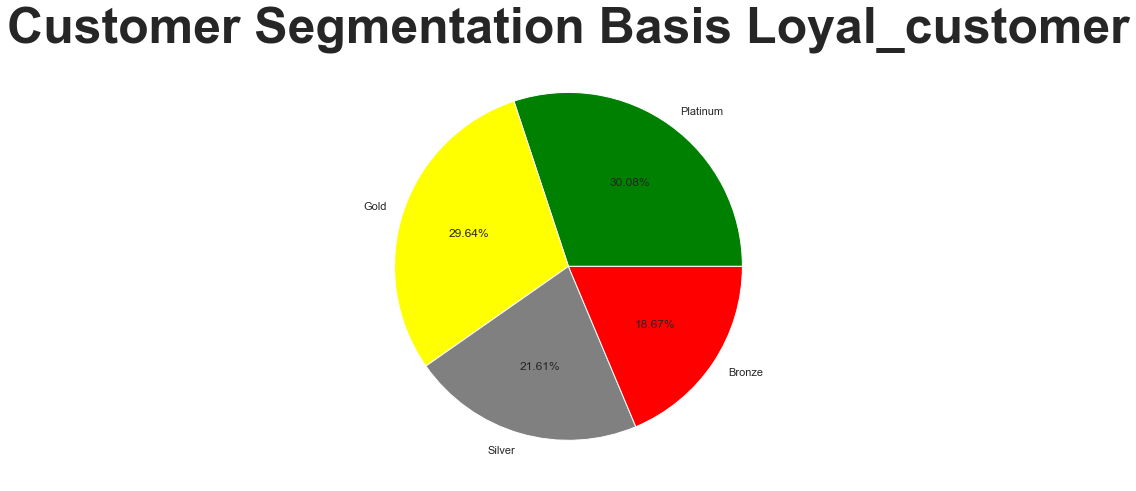

In [59]:
labels = new_datapoint['Loyal_customer']
numbers = new_datapoint['No_Of_Customer']
percentages = new_datapoint['Percentage']
plt.figure(figsize=(8, 8))

colors_dict = {'Platinum': 'green', 'Gold': 'yellow', 'Silver': 'gray', 'Bronze': 'red'}

# Create a pie chart
plt.pie(numbers, labels=labels, autopct='%1.2f%%', colors=[colors_dict[label] for label in labels])

# Add a title
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=50, fontweight='bold')

# Display the chart
plt.show()


# Building Unsupervise Machine Learning method - KMeans

In [60]:
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


In [61]:
RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1

,Recency,Frequency,Monetory
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


In [63]:
# Mandatory preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
RFMScore1_sc = sc.fit_transform(RFMScore1)
RFMScore1_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [64]:
scaled_data = pd.DataFrame(RFMScore1_sc, index=RFMScore1.index, columns= RFMScore1.columns)
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


In [65]:
# Building KMeans Cluster

from sklearn.cluster import KMeans

In [66]:
wcss = []

for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [67]:
wcss

[9014.850261247644,
 5556.252595830578,
 4360.031655505538,
 3346.874295122494,
 2481.0756115519907,
 1978.0159487281821,
 1708.422674661631,
 1496.5260309486216,
 1302.0654193907103,
 1135.2984482971242,
 985.8855468498052,
 864.6200520264736,
 768.3196400397618]

In [68]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

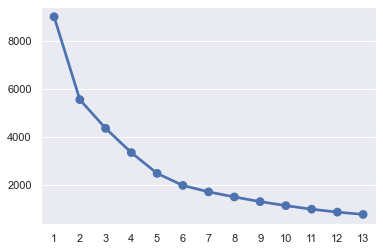

In [70]:
# Elbow method
sns.pointplot(abc, wcss)

In [79]:
KM = KMeans(n_clusters=5, init='k-means++',max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([1, 0, 0, ..., 0, 2, 0])

In [80]:
scaled_data['Cluster'] = KM.labels_

In [81]:
scaled_data

,Recency,Frequency,Monetory,Cluster
0,-0.640796,0.383014,0.375097,1
1,0.173513,-0.284474,0.032622,0
2,-0.462317,-0.089428,-0.061808,0
3,-0.484627,-0.332151,-0.219173,0
4,-0.585021,-0.037416,-0.090784,0
...,...,...,...,...
4344,-0.495782,-0.358157,-0.244298,0
4345,1.333623,-0.371160,-0.255642,2
4346,-0.551556,-0.345154,-0.239059,0
4347,-0.640796,2.853587,0.058705,2


In [82]:
scaled_data.to_csv("best_cluster")

In [83]:
scaled_data['Cluster'].value_counts()

0    2643
1     700
2     639
4     353
3      14
Name: Cluster, dtype: int64

In [85]:
RFMScore1['Cluster'] = KM.labels_

In [86]:
RFMScore1

,Recency,Frequency,Monetory,Cluster
0,4,181,550416.0,1
1,77,27,257404.0,0
2,20,72,176613.0,0
3,18,16,41976.0,0
4,9,84,151822.0,0
...,...,...,...,...
4344,17,10,20480.0,0
4345,181,7,10774.0,2
4346,12,13,24962.0,0
4347,4,751,279720.0,2
